# TITANIC CLASSIFICATION

###### "Import necessary libraries"

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

###### "Load the Titanic dataset from Seaborn"

In [2]:
titanic = sns.load_dataset('titanic')

###### "Handle missing values"

In [3]:
# Fill missing age values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)
# Fill missing embarked values with the mode (most frequent)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

###### "Encode categorical variables"

In [4]:
# # Convert categorical variables (e.g., 'sex', 'class', 'embarked') into numerical format
titanic = pd.get_dummies(titanic, columns=['sex', 'class', 'embarked'], drop_first=True)

###### "Select features (X) and target variable (y)"

In [5]:
#  Define the features (independent variables) and the target variable (dependent variable)
X = titanic[['age', 'fare', 'parch', 'sibsp', 'sex_male', 'class_Second', 'class_Third', 'embarked_Q', 'embarked_S']]
y = titanic['survived']

###### "Split the data into training and testing sets"

In [6]:
#Split the dataset into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### "Create and train the Random Forest Classifier"

In [7]:
# Create a Random Forest Classifier model
clf = RandomForestClassifier(random_state=42)
#Train (fit) the model on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

###### " Make predictions"

In [8]:
#Use the trained model to make predictions on the testing data
y_pred = clf.predict(X_test)

###### "Calculate accuracy"

In [9]:
# Evaluate the model's accuracy by comparing predicted and actual outcomes
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


###### "Generate a classification report"

In [10]:
# Generate a detailed classification report including precision, recall, F1-score, and more
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



###### " Get feature importances from the trained model"

In [11]:
#Extract feature importances from the Random Forest model
feature_importances = clf.feature_importances_

###### " Create a DataFrame to associate feature names with their importances"

In [12]:
#Create a DataFrame for better visualization of feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

###### "Sort the features by importance in descending order"

In [13]:
# Sort the features by their importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

###### "Plot the feature importances"

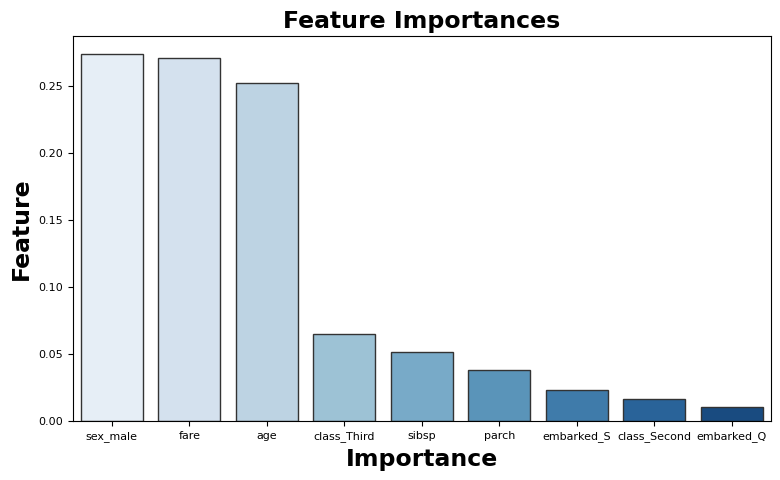

In [14]:
# Create a bar plot to visualize feature importances
plt.figure(figsize=(9, 5))
sns.barplot(y='Importance', x='Feature',data=feature_importance_df, edgecolor="0.2", palette="Blues")
plt.title('Feature Importances',fontsize=17,weight='bold')
plt.xlabel('Importance',fontsize=17,weight='bold')
plt.ylabel('Feature',fontsize=17,weight='bold')
plt.tick_params(labelsize=8)
plt.show()

###### "Display the sorted feature importances"

In [15]:
#Display the sorted feature importances to understand which features are most important
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
        Feature  Importance
4      sex_male    0.273630
1          fare    0.270661
0           age    0.251896
6   class_Third    0.065159
3         sibsp    0.051147
2         parch    0.037996
8    embarked_S    0.022715
5  class_Second    0.016262
7    embarked_Q    0.010535
